In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import imblearn as im
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('../0. Data/data_original.csv')

In [3]:
X = data.drop('Diabetes_012', axis=1)
Y = data['Diabetes_012']

In [4]:
Y.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

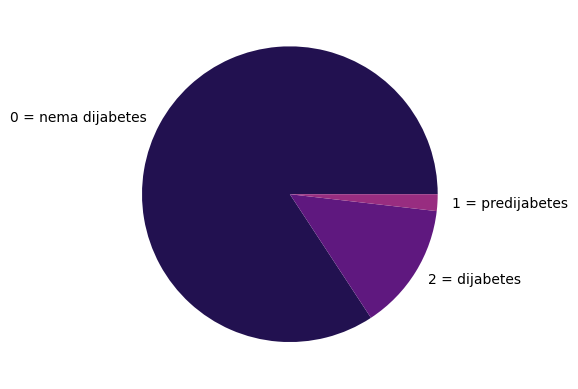

In [5]:
_ = plt.pie(Y.value_counts(), labels = ["0 = nema dijabetes", "2 = dijabetes", "1 = predijabetes"], colors = sb.color_palette('magma'))

# SMOTE

In [6]:
smote = SMOTE(k_neighbors=10, random_state=42)

In [7]:
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [8]:
Y_resampled.value_counts()

0.0    213703
2.0    213703
1.0    213703
Name: Diabetes_012, dtype: int64

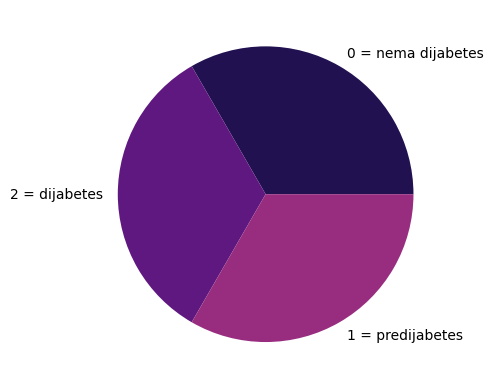

In [9]:
_ = plt.pie(Y_resampled.value_counts(), labels = ["0 = nema dijabetes", "2 = dijabetes", "1 = predijabetes"], colors = sb.color_palette('magma'))

# Čuvanje sređenih skupova

In [10]:
data = X_resampled

In [11]:
data['Diabetes_012'] = Y_resampled

In [12]:
data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1.000000,1.000000,1.0,40.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000,...,0.0,5.000000,18.0,15.0,1.000000,0.000000,9.000000,4.000000,3.000000,0.0
1,0.000000,0.000000,0.0,25.000000,1.000000,0.0,0.0,1.0,0.000000,0.000000,...,1.0,3.000000,0.0,0.0,0.000000,0.000000,7.000000,6.000000,1.000000,0.0
2,1.000000,1.000000,1.0,28.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,...,1.0,5.000000,30.0,30.0,1.000000,0.000000,9.000000,4.000000,8.000000,0.0
3,1.000000,0.000000,1.0,27.000000,0.000000,0.0,0.0,1.0,1.000000,1.000000,...,0.0,2.000000,0.0,0.0,0.000000,0.000000,11.000000,3.000000,6.000000,0.0
4,1.000000,1.000000,1.0,24.000000,0.000000,0.0,0.0,1.0,1.000000,1.000000,...,0.0,2.000000,3.0,0.0,0.000000,0.000000,11.000000,5.000000,4.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641104,0.310319,1.000000,1.0,35.620638,0.310319,0.0,0.0,0.0,1.000000,0.310319,...,0.0,4.000000,15.0,15.0,0.689681,0.000000,7.000000,5.000000,8.000000,2.0
641105,1.000000,0.992412,1.0,29.000000,0.007588,0.0,0.0,1.0,1.000000,1.000000,...,0.0,3.000000,0.0,0.0,0.007588,0.000000,12.992412,5.000000,5.000000,2.0
641106,1.000000,1.000000,1.0,27.000000,1.000000,0.0,0.0,1.0,1.000000,0.242494,...,0.0,3.242494,0.0,0.0,0.000000,0.000000,10.000000,4.000000,3.242494,2.0
641107,1.000000,1.000000,1.0,29.000000,1.000000,0.0,1.0,1.0,1.000000,1.000000,...,0.0,2.876033,0.0,0.0,1.000000,0.123967,12.000000,6.000000,6.876033,2.0


In [13]:
data.to_csv('../0. Data/data_balanced_kp.csv')